C:\Users\jas_t\anaconda3\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
C:\Users\jas_t\anaconda3\lib\site-packages\ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
C:\Users\jas_t\anaconda3\lib\site-packages\ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use M

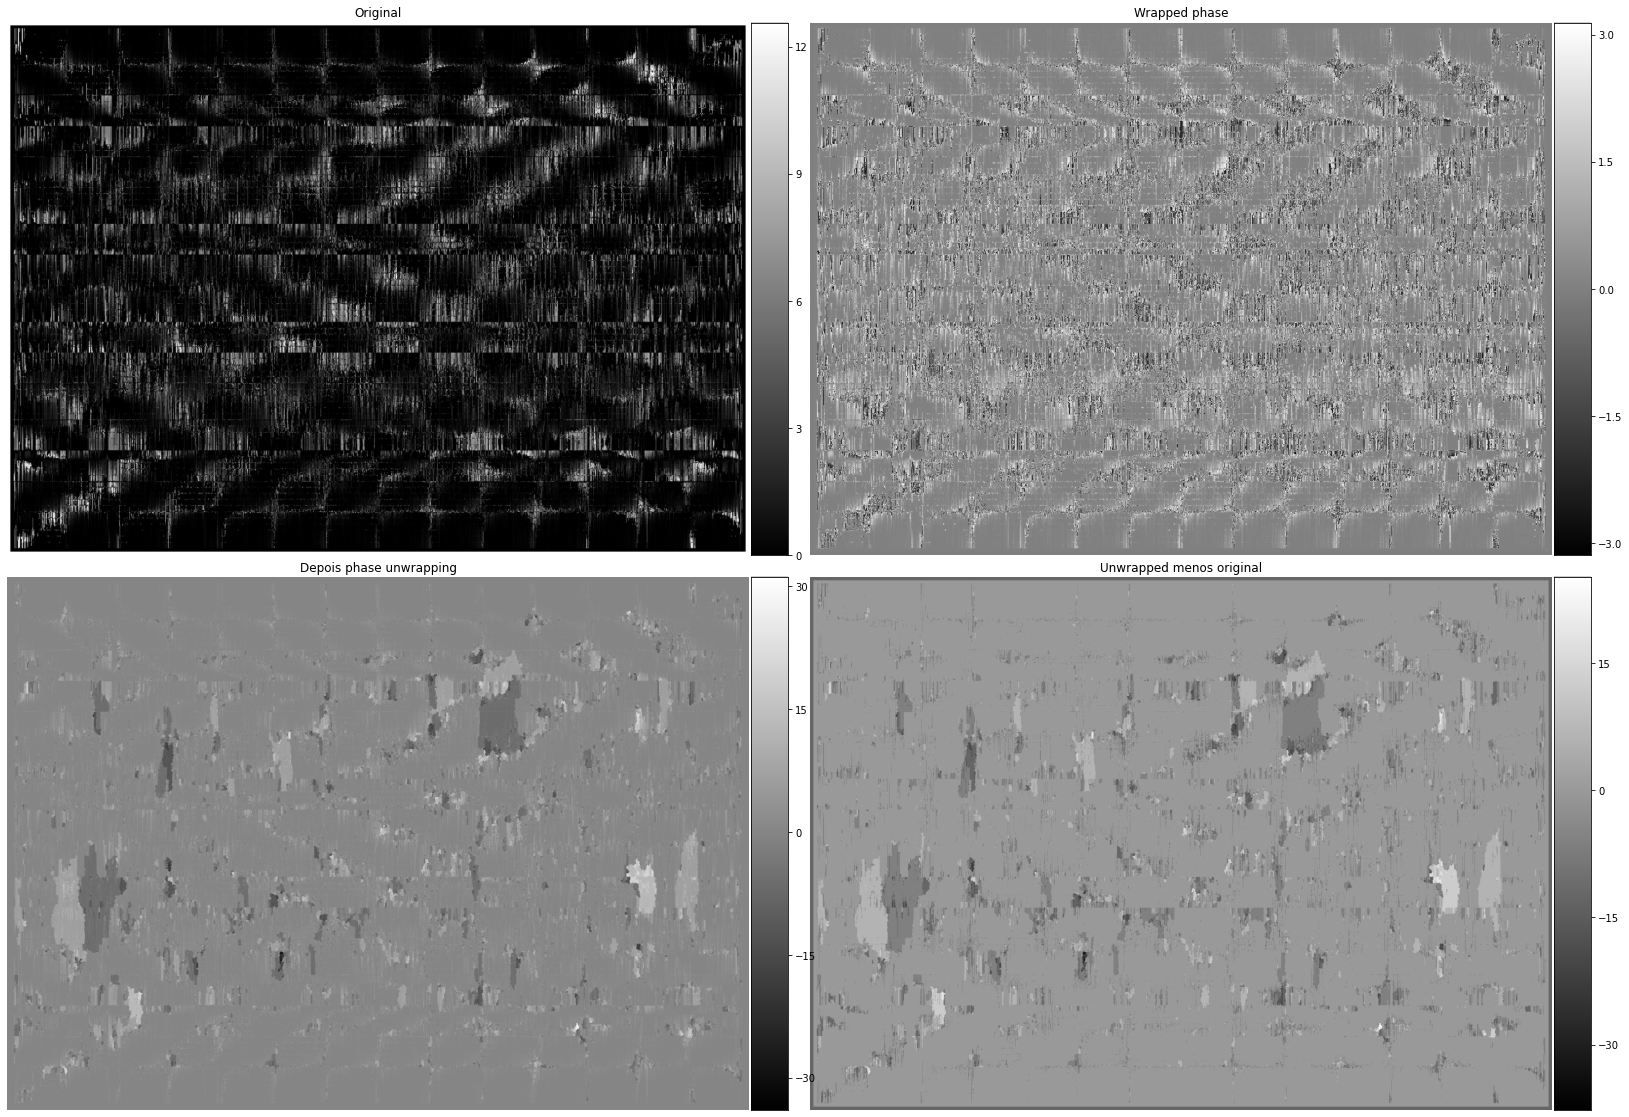

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import img_as_float, color, exposure
from skimage.restoration import unwrap_phase
from mpl_toolkits.axes_grid1 import ImageGrid

img = plt.imread('jh1.jpg')
# Carregar uma imagem como uma escala de cinza de ponto flutuante
image = color.rgb2gray(img_as_float(img))
# Dimensione a imagem para [0, 4*pi]
image = exposure.rescale_intensity(image, out_range=(0, 4 * np.pi))
# Crie uma imagem encapsulada em fase no intervalo [-pi, pi)
image_wrapped = np.angle(np.exp(1j * image))
# Executar desempacotamento de fase
image_unwrapped = unwrap_phase(image_wrapped)

fig = plt.figure(figsize=(40,20))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(2, 2),
                 axes_pad=0.3,
                 cbar_mode="each",
                 cbar_pad=0.03)

im0 = grid[0].imshow(image, cmap='gray',  vmin=0, vmax=4 * np.pi)
grid[0].set_title('Original')
grid.cbar_axes[0].colorbar(im0)

im1 = grid[1].imshow(image_wrapped,cmap='gray', vmin=-np.pi, vmax=np.pi)
grid[1].set_title('Wrapped phase')
grid.cbar_axes[1].colorbar(im1)

im2 = grid[2].imshow(image_unwrapped, cmap='gray')
grid[2].set_title('Depois phase unwrapping')
grid.cbar_axes[2].colorbar(im2)

im3 = grid[3].imshow(image_unwrapped - image, cmap='gray')
grid[3].set_title('Unwrapped menos original')
grid.cbar_axes[3].colorbar(im3)

for i in range(4):
    grid[i].axis("off")

plt.savefig('wrap_imagem.jpg',dpi=150)
plt.show()